In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving RELIANCEnew.csv to RELIANCEnew.csv
User uploaded file "RELIANCEnew.csv" with length 186942 bytes


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10 #setting figure size

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #for normalizing data


In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [7]:
df = pd.read_csv('RELIANCEnew.csv')


In [8]:
df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,08-08-2013,RELIANCE,EQ,872.45,867.35,872.45,857.15,863.15,865.65,865.30,2598354,2.248350e+14,69069,1457520,0.5609
1,12-08-2013,RELIANCE,EQ,865.65,869.00,872.85,840.45,842.00,845.65,853.20,1995272,1.702370e+14,67414,1011327,0.5069
2,13-08-2013,RELIANCE,EQ,845.65,843.00,859.95,835.00,851.75,852.90,851.92,2637165,2.246660e+14,82934,1419166,0.5381
3,14-08-2013,RELIANCE,EQ,852.90,856.00,868.00,847.45,865.80,865.00,858.17,2573906,2.208860e+14,63414,1288680,0.5007
4,16-08-2013,RELIANCE,EQ,865.00,865.00,867.00,817.15,832.00,826.70,836.66,6245328,5.225220e+14,165720,3740376,0.5989


In [9]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [10]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1676.000000
mean,1078.478580,1079.620346,1091.738932,1067.202894,1078.731683,1078.831772,1079.610489,6.013097e+06,6.900078e+14,1.333089e+05,2.851436e+06,0.511686
std,206.842962,207.568811,209.566662,204.983511,207.215580,206.996282,207.150087,5.431981e+06,7.286718e+14,1.059694e+05,2.131851e+06,0.113279
min,780.900000,782.450000,793.400000,763.900000,781.200000,780.900000,785.510000,2.315110e+05,2.053680e+13,5.236000e+03,9.803000e+04,0.150800
25%,921.537500,924.487500,933.062500,914.437500,922.412500,922.262500,923.540000,2.813245e+06,2.747222e+14,7.309325e+04,1.518761e+06,0.435950
50%,1007.975000,1008.200000,1019.725000,999.800000,1007.950000,1008.000000,1010.520000,4.345144e+06,4.358765e+14,1.012255e+05,2.247443e+06,0.517650
75%,1232.312500,1234.250000,1248.475000,1219.725000,1232.675000,1232.850000,1232.710000,7.214312e+06,8.676760e+14,1.596930e+05,3.426201e+06,0.590875
max,1650.100000,1663.000000,1664.900000,1622.800000,1654.000000,1650.100000,1645.900000,6.523089e+07,8.835030e+15,1.194059e+06,1.919505e+07,0.832700


In [11]:
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

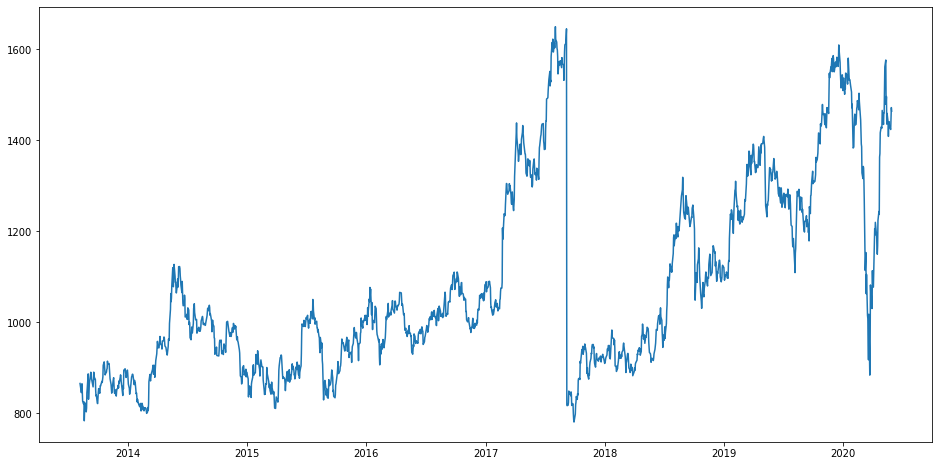

In [12]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [13]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [14]:
train = new_data[:987]
valid = new_data[987:]


In [15]:
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(987, 2)


In [16]:
print('\n Shape of validation set:')
print(valid.shape)


 Shape of validation set:
(689, 2)


In [17]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [18]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
2256.833089179788


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


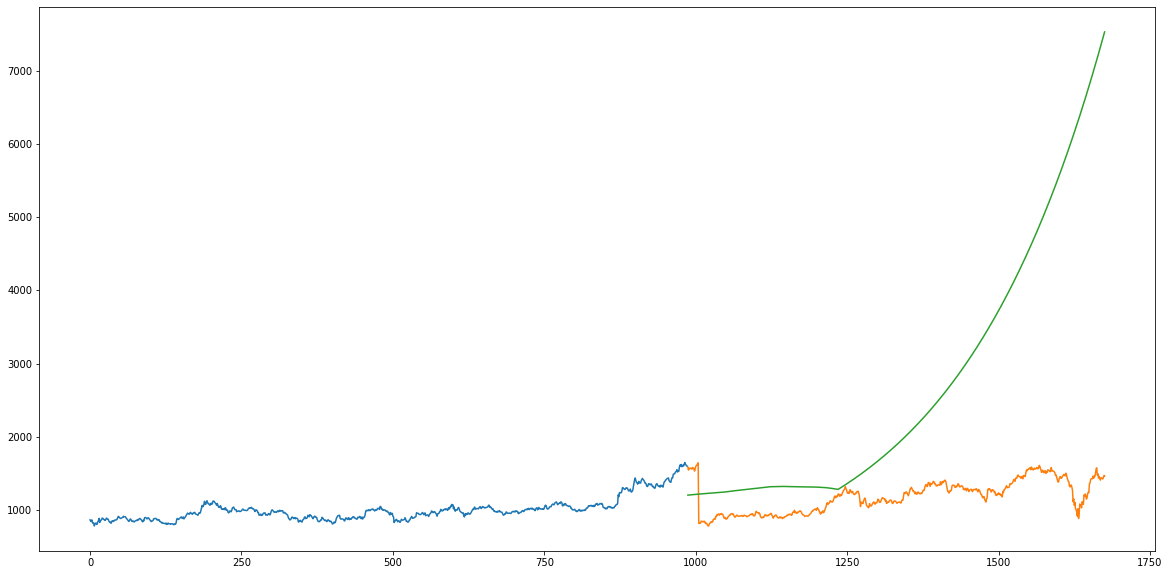

In [19]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [20]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [21]:
data = df.sort_index(ascending=True, axis=0)

In [22]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [23]:
!pip install fastai==0.7.0

     |████████████████████████████████| 112 kB 5.5 MB/s 
     |████████████████████████████████| 1.5 MB 27.4 MB/s 
ERROR: Could not find a version that satisfies the requirement torch<0.4 (from fastai) (from versions: 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.2.0, 1.3.0, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0)
ERROR: No matching distribution found for torch<0.4


In [24]:
from fastai.tabular import *
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:64: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df[prefix + 'Elapsed'] = field.astype(np.int64) // 10 ** 9


In [25]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

255.95586034065457

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


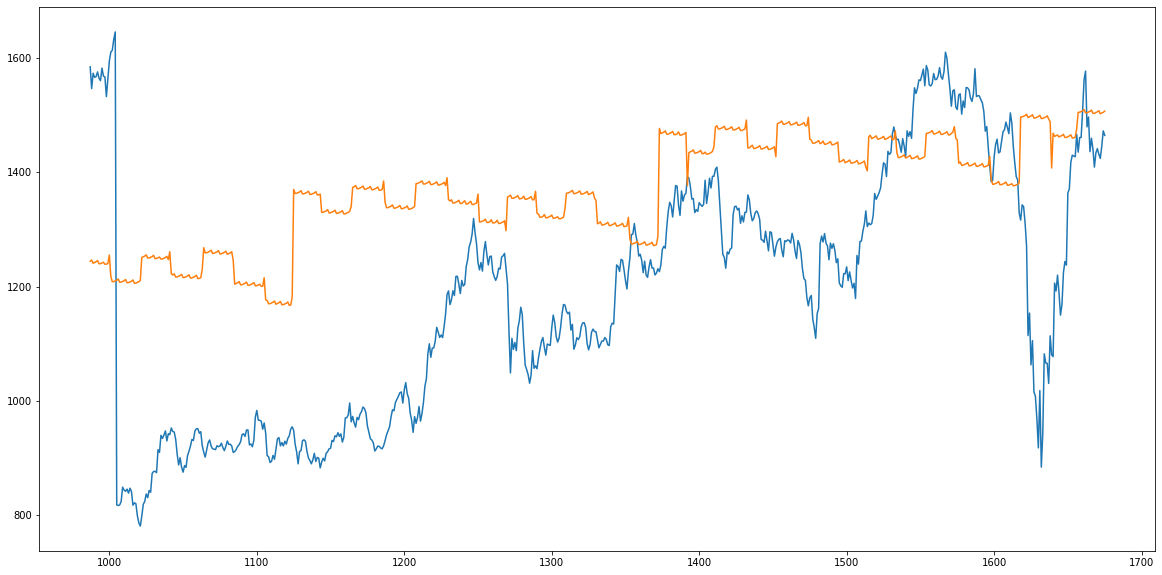

In [29]:
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index


plt.plot(valid[['Close', 'Predictions']])

In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
R2_Score = r2_score(y_valid,preds)
R2_Score

-0.6480260319115976

In [31]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [32]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [33]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [34]:
model.fit(x_train,y_train)
preds = model.predict(x_valid)


In [35]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

280.16914090439394

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


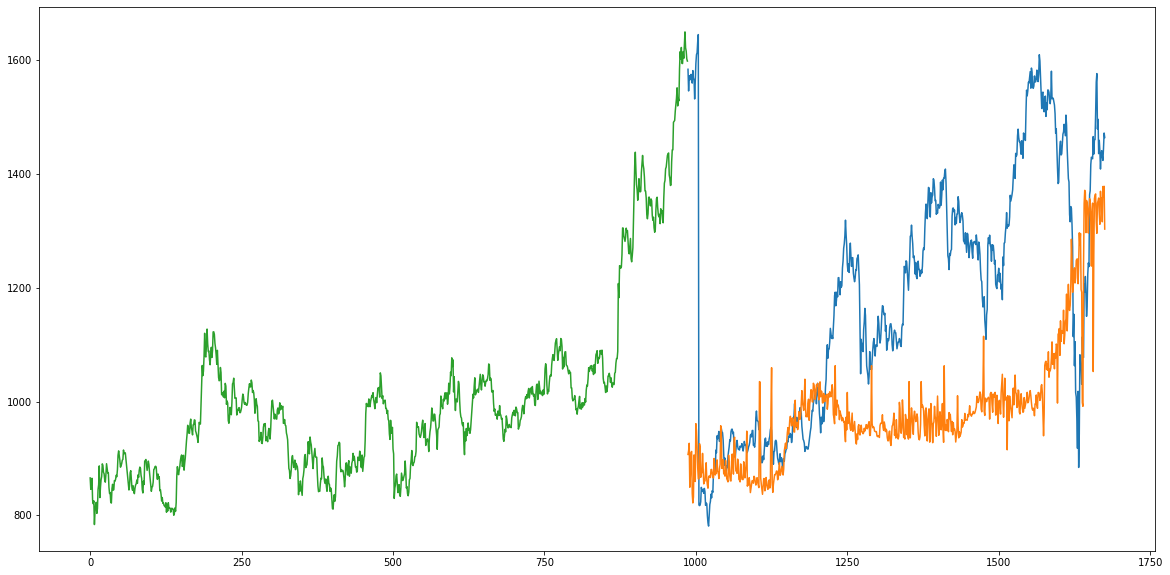

In [36]:

valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
R2_Score = r2_score(valid['Close'],valid['Predictions'])
R2_Score

-0.6480260319115976

In [38]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [39]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.  DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [40]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)


In [41]:
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]


In [42]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [43]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


927/927 - 32s - loss: 0.0038 - 32s/epoch - 35ms/step


In [44]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [45]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

80.12397694877595

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


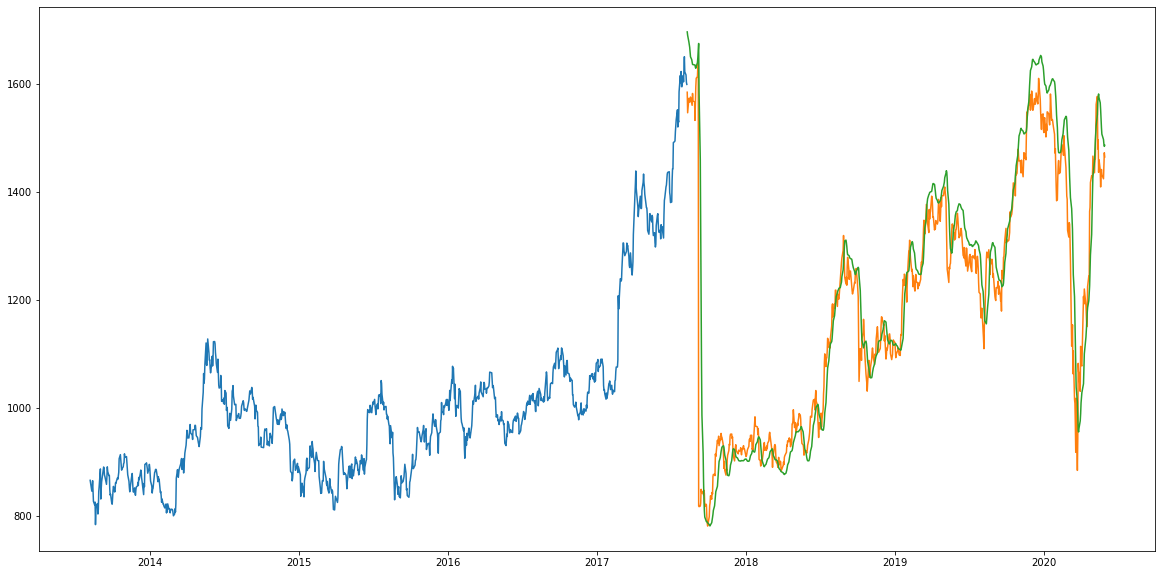

In [46]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [47]:
closing_price

array([[1696.0199],
       [1689.6764],
       [1677.6333],
       [1667.5981],
       ...,
       [1496.7179],
       [1488.0802],
       [1484.0067],
       [1486.1115]], dtype=float32)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
R2_Score = r2_score(valid['Close'],closing_price)
R2_Score

0.8652128578277631